In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import re
import string

In [39]:
pip install transformers

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
    --------------------------------------- 0.2/9.1 MB 3.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/9.1 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.1 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/9.1 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/9.1 MB 3.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.1 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.1 MB 4.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.1 MB 3.9 MB/s eta 0:00:02
   ------- ---------------

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [4]:
df_train['keyword'].replace(np.nan,'',inplace=True)
df_train['location'].replace(np.nan,'',inplace=True)

In [5]:
df_test['keyword'].replace(np.nan,'',inplace=True)
df_test['location'].replace(np.nan,'',inplace=True)

In [6]:
df_train['combined_text'] = df_train['text'] +' '+df_train['keyword']+' '+df_train['location']
df_test['combined_text'] = df_test['text'] + ' ' + df_test['keyword'] + ' ' + df_test['location']

In [7]:
vocab_size = 20000
max_sentence_lenght = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

In [8]:
tokenizer.fit_on_texts(df_train['combined_text'])

In [9]:
X_train = tokenizer.texts_to_sequences(df_train['combined_text'])
X_train = pad_sequences(X_train, maxlen=max_sentence_lenght, padding='post')

X_test = tokenizer.texts_to_sequences(df_test['combined_text'])
X_test = pad_sequences(X_test, maxlen = max_sentence_lenght, padding='post')

In [10]:
y_train = df_train['target']

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim = vocab_size, output_dim=128, input_length = max_sentence_lenght),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.LSTM(64, dropout=0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5764 - loss: 0.6833 - val_accuracy: 0.5345 - val_loss: 0.6909
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5794 - loss: 0.6831 - val_accuracy: 0.5345 - val_loss: 0.6921
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5870 - loss: 0.6798 - val_accuracy: 0.5345 - val_loss: 0.6949
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5856 - loss: 0.6790 - val_accuracy: 0.5345 - val_loss: 0.6936


In [21]:
from tensorflow.keras.layers import Embedding

# Load pre-trained GloVe embeddings
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



Epoch 1/10


C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6773 - loss: 0.6133 - val_accuracy: 0.7781 - val_loss: 0.5013
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 0.4934 - val_accuracy: 0.7722 - val_loss: 0.4928
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.4720 - val_accuracy: 0.7879 - val_loss: 0.4761
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.4542 - val_accuracy: 0.7761 - val_loss: 0.4719
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4450 - val_accuracy: 0.7978 - val_loss: 0.4679
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4553 - val_accuracy: 0.7866 - val_loss: 0.4660
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4384 - val_accuracy: 0.7879 - val_loss: 0.4564
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8060 - loss: 0.4323 - val_accuracy: 0.7794 - val_

In [55]:
# Model with pre-trained embeddings
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length = max_sentence_lenght, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

C:\Users\Petr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [63]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.8800 - loss: 0.3045 - val_accuracy: 0.8070 - val_loss: 0.4911
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.8830 - loss: 0.2919 - val_accuracy: 0.8030 - val_loss: 0.4992
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.8842 - loss: 0.2903 - val_accuracy: 0.8030 - val_loss: 0.5025
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.8950 - loss: 0.2765 - val_accuracy: 0.8017 - val_loss: 0.5036
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.8910 - loss: 0.2830 - val_accuracy: 0.8030 - val_loss: 0.5070
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 286ms/step - accuracy: 0.8900 - loss: 0.2829 - val_accuracy: 0.8030 - val_loss: 0.5150
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.8974 - loss: 0.2694 - val_accuracy: 0.8024 - val_loss: 0.5190
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.8943 - loss: 0.2666 - val_accuracy: 0.

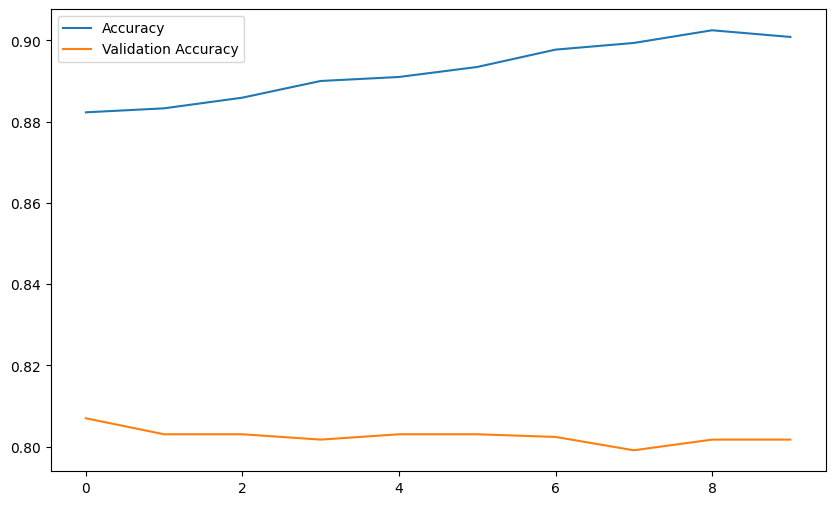

In [64]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10,6))
plt.plot(range(10), accuracy)
plt.plot(val_accuracy)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [61]:
test_predictions = (model.predict(X_test) > 0.5).astype("int32").flatten()

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [62]:
submission = pd.DataFrame({'id': df_test['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)